# Примеры использования функций

## Навигация

- [eda](#eda)
   - [eda.cat_feature_report](#eda.cat_feature_report)
   - [eda.num_feature_report](#eda.num_feature_report)
   - [eda.na_bar_plot](#eda.na_bar_plot)
   - [eda.area_plot](#eda.area_plot)
   - [eda.ridge_plot](#eda.ridge_plot)
   - [eda.na_datashift](#eda.na_datashift)
- [data_shift](#data_shift)
   - [data_shift.area_plot](#data_shift.area_plot)
   - [data_shift.ridge_plot](#data_shift.ridge_plot)
   - [data_shift.na_datashift](#data_shift.na_datashift)
   - [data_shift.get_forget_weights](#data_shift.get_forget_weights)
- [classification](#classification)
   - [classification.my_binary_classification_report](#classification.my_binary_classification_report)
   - [classification.precision_recall_plot](#classification.precision_recall_plot)
- [business](#business)
   - [business.threshold_money_plot](#business.threshold_money_plot)
   - [business.commercial_impact](#business.commercial_impact)

In [1]:
import sys
sys.path.append('..')

import lightgbm
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

import utils

In [2]:
RANDOM_STATE = 42

In [3]:
data = pd.read_csv('data.csv', parse_dates=['app_date'])
data.head()

,app_date,loan_amount,interest_amount,age,marital_status,default_status
0,2022-04-23 03:52:38.113,200000,87073,47.493593,Soltero,0
1,2021-10-11 09:23:01.910,200000,89460,33.762715,Union libre,1
2,2021-10-11 10:29:04.090,200000,56042,26.491608,Union libre,0
3,2021-10-11 21:40:17.723,100000,24430,37.128501,Union libre,1
4,2021-10-11 23:01:38.310,200000,89460,21.819067,Soltero,1


In [4]:
data['marital_status'] = pd.Categorical(data['marital_status'])

train_data, test_data = train_test_split(data, stratify=data['default_status'], random_state=RANDOM_STATE)

X_train = train_data.drop(columns=['app_date', 'default_status', 'interest_amount'])
X_test = test_data.drop(columns=['app_date', 'default_status', 'interest_amount'])
y_train = train_data['default_status']
y_test = test_data['default_status']

## eda

[К навигаци](#Навигация)

### eda.cat_feature_report

[К навигаци](#Навигация)

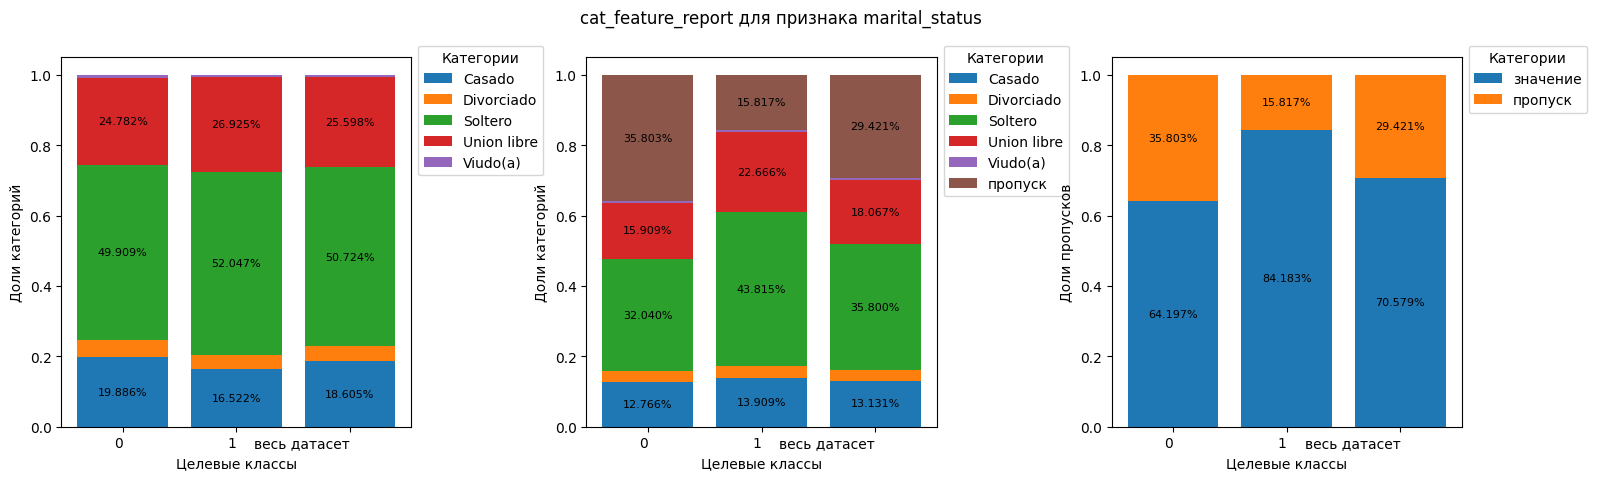

In [5]:
fig, axes = utils.eda.cat_feature_report(data, feature_colname='marital_status', target_colname='default_status')

### eda.num_feature_report

[К навигаци](#Навигация)

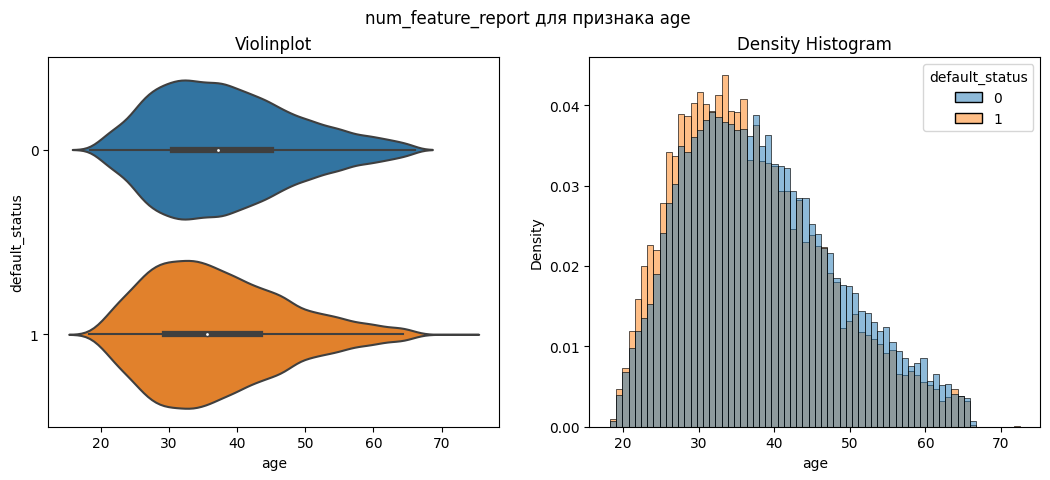

In [6]:
fig, axes = utils.eda.num_feature_report(data, feature_colname='age', target_colname='default_status')

### eda.na_bar_plot

[К навигаци](#Навигация)

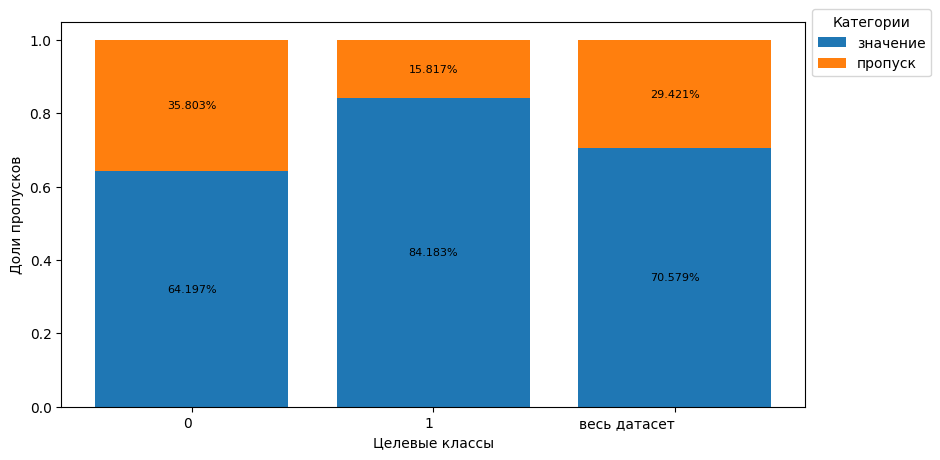

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
utils.eda.na_bar_plot(data, feature_colname='marital_status', target_colname='default_status', ax=ax)
plt.show()

### eda.area_plot

[К навигаци](#Навигация)

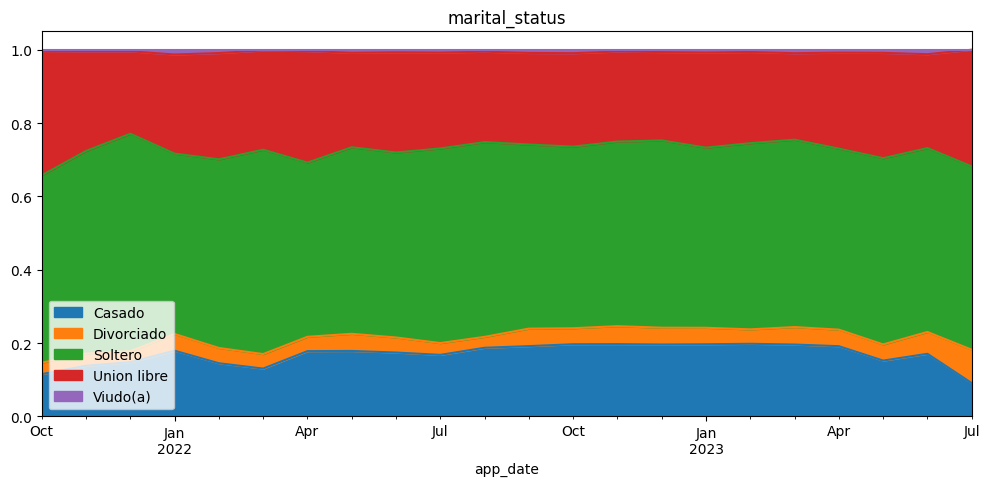

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
utils.eda.area_plot(data, feature_colname='marital_status', date_colname='app_date', freq='M', ax=ax)
plt.show()

### eda.ridge_plot

[К навигаци](#Навигация)

E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


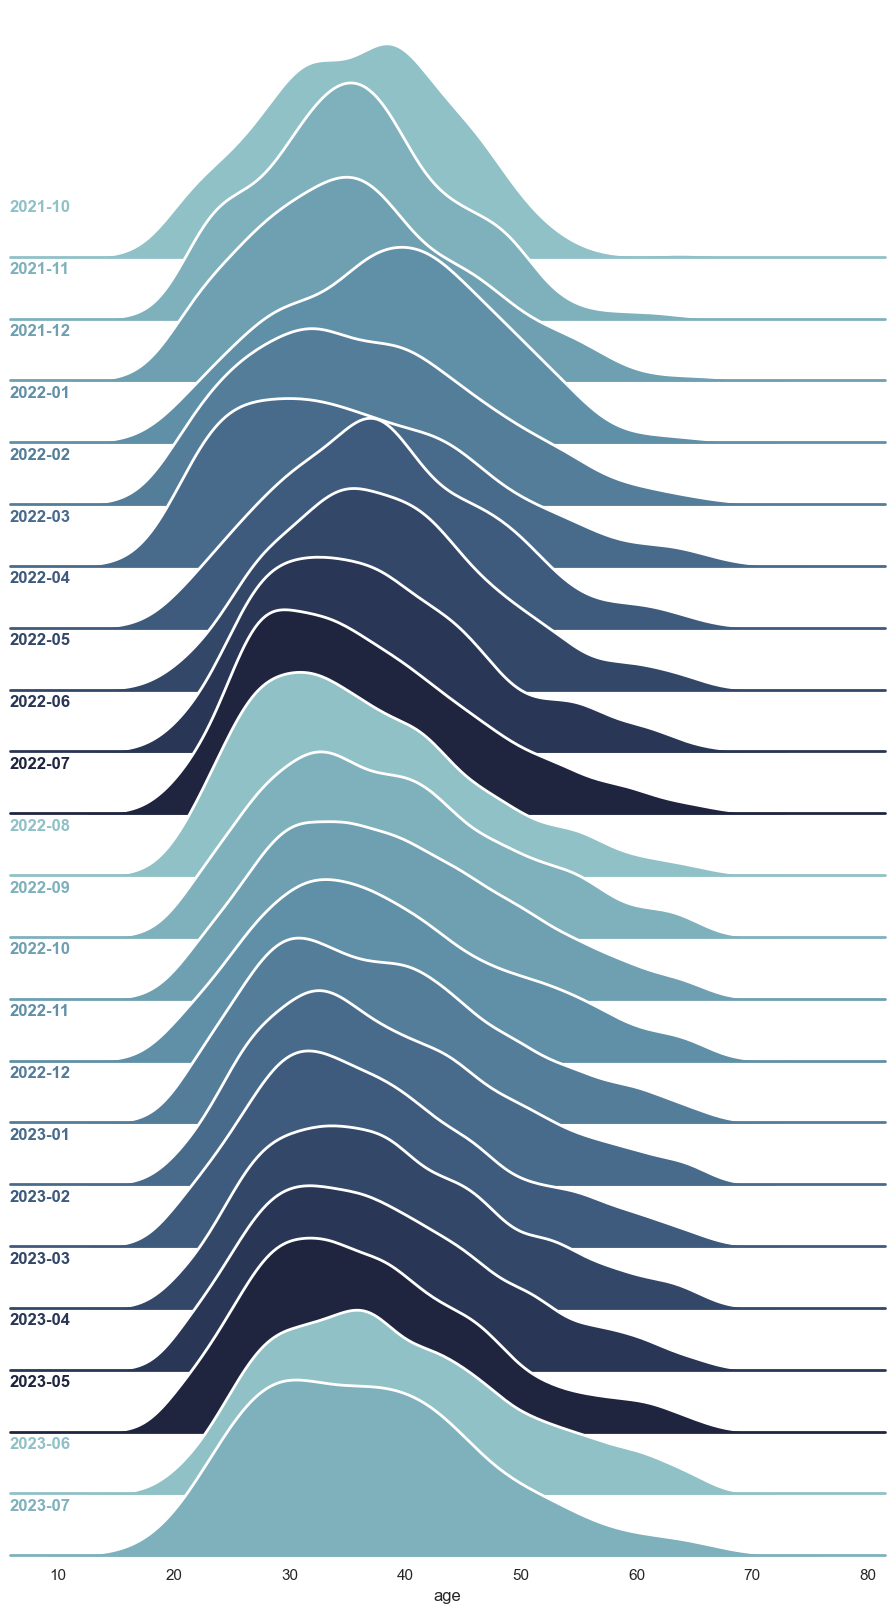

In [9]:
utils.eda.ridge_plot(data, feature_colname='age', date_colname='app_date', freq='M')

### eda.na_datashift

[К навигаци](#Навигация)

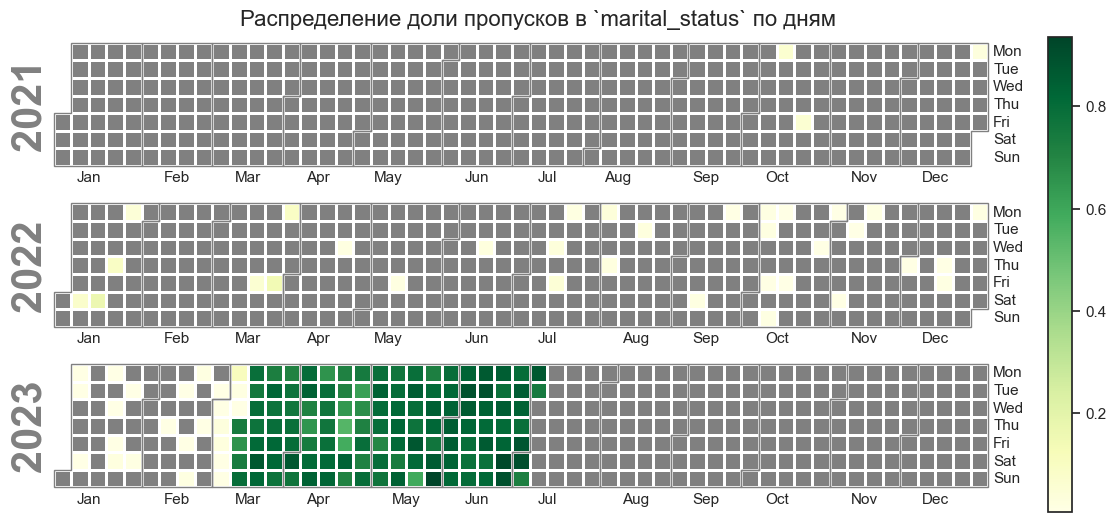

In [10]:
fig, ax = utils.eda.na_datashift(
    data,
    feature_colname='marital_status',
    target_colname='default_status',
    date_colname='app_date',
    figsize=(12, 5),
)

## data_shift

[К навигаци](#Навигация)

### data_shift.area_plot

[К навигаци](#Навигация)

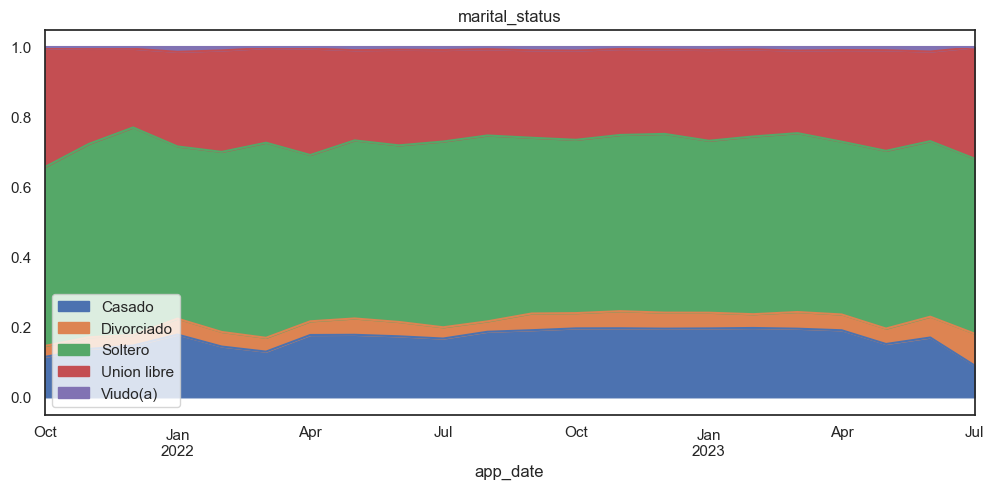

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
utils.data_shift.area_plot(data, feature_colname='marital_status', date_colname='app_date', freq='M', ax=ax)
plt.show()

### data_shift.ridge_plot

[К навигаци](#Навигация)

E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Projects\Finstar Financial Group\utils\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


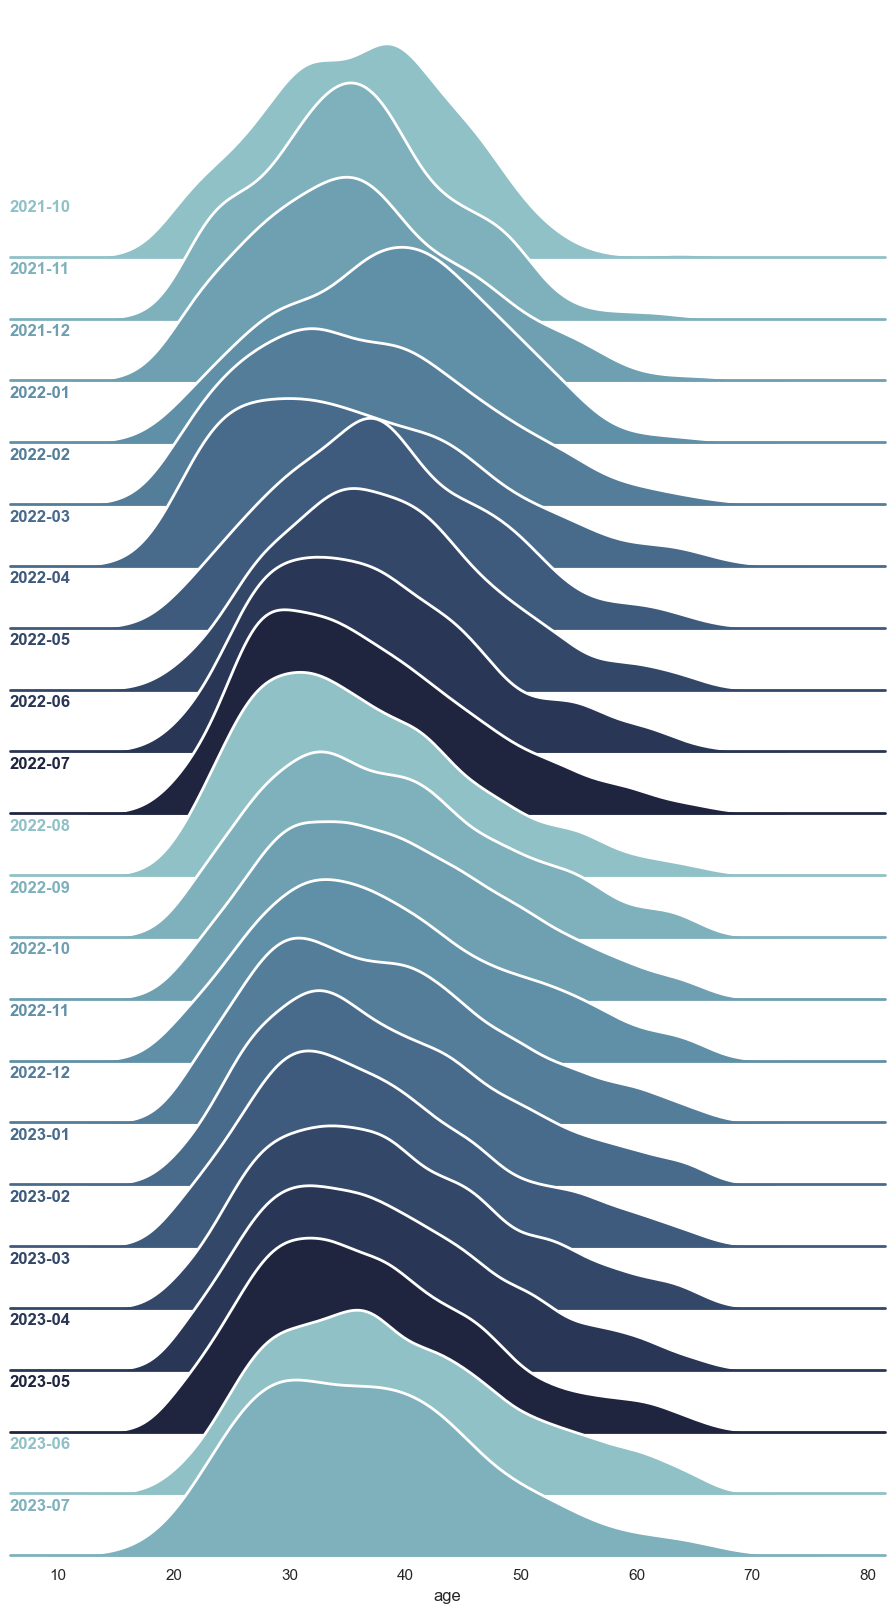

In [12]:
utils.data_shift.ridge_plot(data, feature_colname='age', date_colname='app_date', freq='M')

### data_shift.na_datashift

[К навигаци](#Навигация)

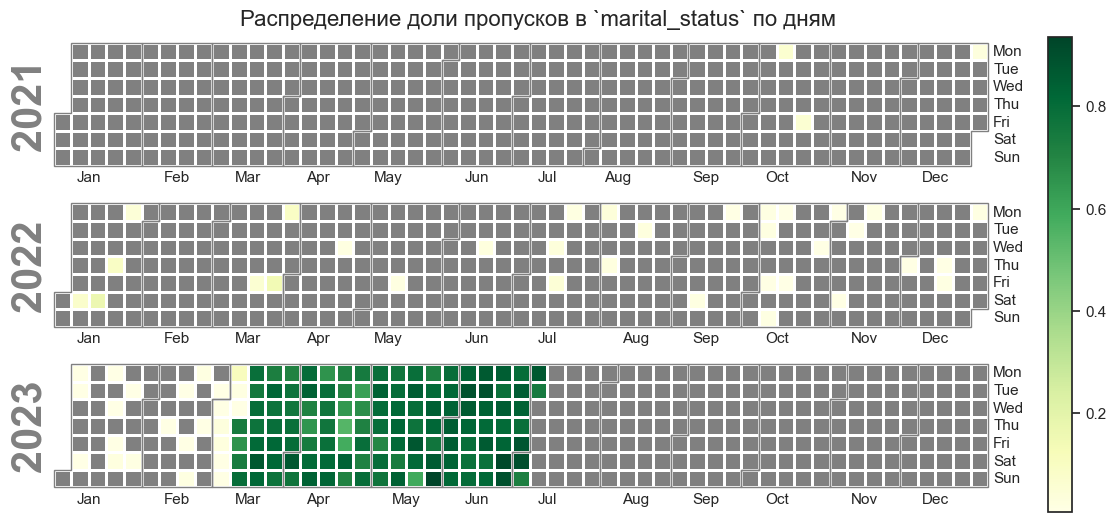

In [13]:
fig, ax = utils.data_shift.na_datashift(
    data,
    feature_colname='marital_status',
    target_colname='default_status',
    date_colname='app_date',
    figsize=(12, 5),
)

### data_shift.get_forget_weights

[К навигаци](#Навигация)

In [14]:
data['forget_weights'] = utils.data_shift.get_forget_weights(date_col=data['app_date'], coefficient=.1)
data[['app_date', 'forget_weights']]

,app_date,forget_weights
0,2022-04-23 03:52:38.113,0.205891
1,2021-10-11 09:23:01.910,0.109419
2,2021-10-11 10:29:04.090,0.109419
3,2021-10-11 21:40:17.723,0.109419
4,2021-10-11 23:01:38.310,0.109419
...,...,...
41690,2023-07-03 14:51:23.577,1.000000
41691,2023-07-03 16:01:08.697,1.000000
41692,2023-07-04 13:58:58.180,1.000000
41693,2023-07-04 14:25:32.087,1.000000


## classification

[К навигаци](#Навигация)

### classification.my_binary_classification_report

[К навигаци](#Навигация)

In [15]:
model = lightgbm.LGBMClassifier(
    objective='binary',
    is_unbalance=True,

    boosting_type='gbdt',
    learning_rate=.1,
    n_estimators=100,
    max_depth=1,

    n_jobs=-1,
    random_state=RANDOM_STATE,
)
model.fit(X_train, y_train)

LGBMClassifier(is_unbalance=True, max_depth=1, objective='binary',
               random_state=42)

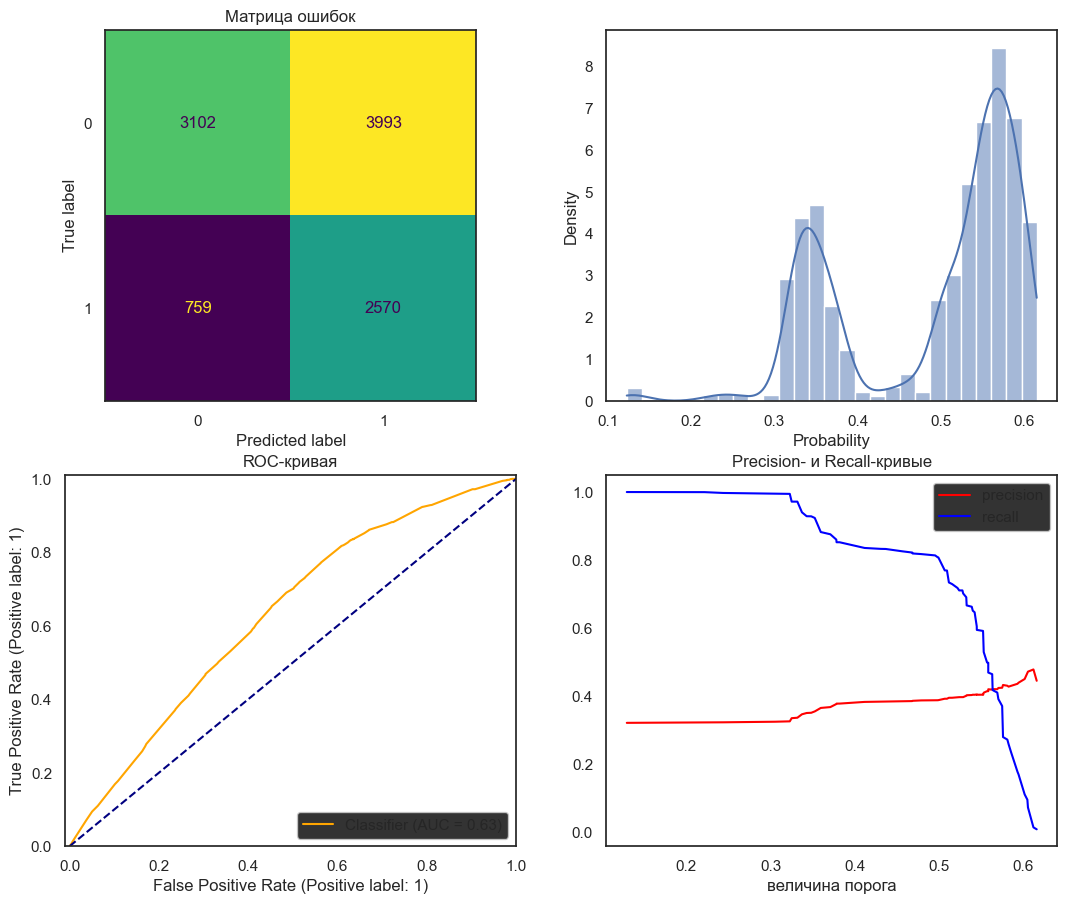

              precision    recall  f1-score   support

           0       0.80      0.44      0.57      7095
           1       0.39      0.77      0.52      3329

    accuracy                           0.54     10424
   macro avg       0.60      0.60      0.54     10424
weighted avg       0.67      0.54      0.55     10424

Индекс Gini = 0.2636617878082945


In [16]:
utils.classification.my_binary_classification_report(classifier=model, X=X_test, y_true=y_test)

### classification.precision_recall_plot

[К навигаци](#Навигация)

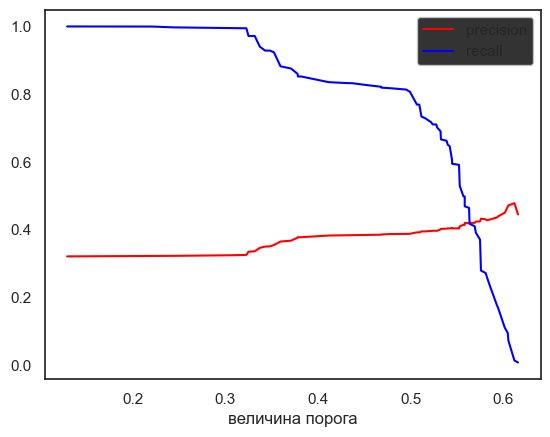

In [17]:
ax = utils.classification.precision_recall_plot(y_true=y_test, y_proba=model.predict_proba(X_test)[:, 1])

## business

[К навигаци](#Навигация)

### business.threshold_money_plot

[К навигаци](#Навигация)

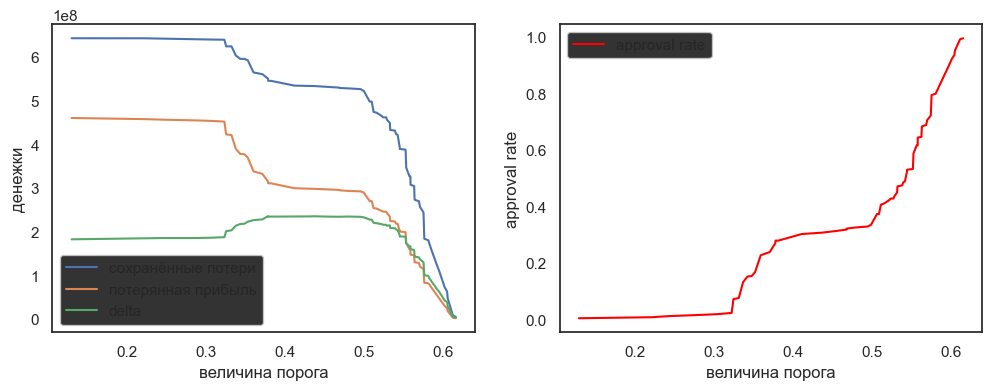

In [18]:
utils.business.threshold_money_plot(
    data=test_data,
    y_proba=model.predict_proba(X_test)[:, 1],
    target_colname='default_status',
    loan_colname='loan_amount',
    interest_colname='interest_amount',
)

### business.commercial_impact

[К навигаци](#Навигация)

In [19]:
utils.business.commercial_impact(
    data=test_data,
    y_pred=model.predict(X_test),
    target_colname='default_status',
    loan_colname='loan_amount',
    interest_colname='interest_amount',
    report=True,
)

Сохранили потерь 498_490_000
Упустили прибыли 270_511_162
Коммерческая значимость 227_978_838
